# Problem Statement: Implementing Feedforward Neural Networks with Keras and TensorFlow

## Steps to Implement

1. **Import the Necessary Packages**
2. **Load the Training and Testing Data**
   - MNIST or CIFAR10
3. **Define the Network Architecture Using Keras**
4. **Train the Model Using SGD**
5. **Evaluate the Network**
6. **Plot the Training Loss and Accuracy**


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
# Load the MNIST

In [2]:
# Load the MNIST dataset and preprocess it
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize data to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

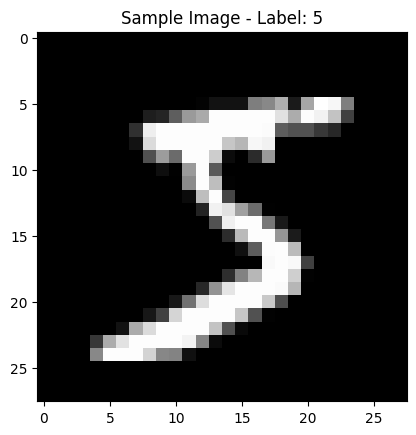

In [3]:
# Visualize a sample from the dataset
plt.imshow(x_train[0], cmap="gray")
plt.title(f"Sample Image - Label: {y_train[0]}")
plt.show()

In [4]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)), # Flatten input images
keras.layers.Dense(128, activation='relu'), # Hidden layer
keras.layers.Dense(10, activation='softmax') # Output layer for 10 classes
])
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Compile the model using SGD optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer,
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.6467 - accuracy: 0.8364 - val_loss: 0.3563 - val_accuracy: 0.9045
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3354 - accuracy: 0.9057 - val_loss: 0.2912 - val_accuracy: 0.9186
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2856 - accuracy: 0.9199 - val_loss: 0.2589 - val_accuracy: 0.9265
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2547 - accuracy: 0.9285 - val_loss: 0.2387 - val_accuracy: 0.9315
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2312 - accuracy: 0.9349 - val_loss: 0.2154 - val_accuracy: 0.9385
Epoch 6/10
 160/1875 [=>............................] - ETA: 6s - loss: 0.2369 - accuracy: 0.9344

In [ ]:
# Evaluate the network on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

In [ ]:
# Visualize a random test sample and its predicted label
n = random.randint(0, len(x_test) - 1)
plt.imshow(x_test[n], cmap="gray")
plt.title(f"Random Test Image - Label: {y_test[n]}")
plt.show()
# Predict the label for the random test sample
predicted_value = model.predict(x_test)
print(f"Predicted Label: {predicted_value[n].argmax()}")

In [ ]:
# Plot training accuracy and loss
plt.figure(figsize=(6, 4))
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
plt.tight_layout()
plt.show()